<a href="https://colab.research.google.com/github/rafaelkashira23/Projeto-Do-ETL-ao-Machine-Learning---120-anos-de-Olimpiadas---Impacta-Tecnologia/blob/main/120_ANOS_OLIMPIADAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

Importação de dados e unificação de tabelas

In [2]:
atleta = pd.read_csv('/content/athlete_events.csv', sep=',', encoding="UTF-8")

In [3]:
regiao = pd.read_csv('/content/noc_regions.csv', sep=',', encoding="UTF-8")

In [4]:
olim = pd.merge(atleta, regiao, on='NOC', how='left')

In [5]:
#Renomeando as colunas
olim.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [6]:
olim = olim.rename(columns={'Name':'Nome', 'Sex':'Sexo', 'Age':'Idade', 'Height':'Altura', 'Weight':'Peso', 'Team':'Time', 'NOC':'Sigla_pais', 'Games':'Jogo',
       'Year':'Ano', 'Season':'Temporada', 'City':'cidade', 'Sport':'Esporte', 'Event':'Evento', 'Medal':'Medalha', 'region':'Pais', 'notes':'Obs'})

In [7]:
olim.head(1)

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla_pais,Jogo,Ano,Temporada,cidade,Esporte,Evento,Medalha,Pais,Obs
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [8]:
olim = olim.rename(columns={'Sigla_pais':'Sigla'})

REMOVENDO DUPLICIDADES

In [9]:
olim.shape

(271116, 17)

In [10]:
olim = olim.drop_duplicates()

In [11]:
olim.shape

(269731, 17)

REMOVENDO DADOS NULOS

In [12]:
olim.isnull().any()

ID           False
Nome         False
Sexo         False
Idade         True
Altura        True
Peso          True
Time         False
Sigla        False
Jogo         False
Ano          False
Temporada    False
cidade       False
Esporte      False
Evento       False
Medalha       True
Pais          True
Obs           True
dtype: bool

In [13]:
olim.isnull().sum()

ID                0
Nome              0
Sexo              0
Idade          9315
Altura        58814
Peso          61527
Time              0
Sigla             0
Jogo              0
Ano               0
Temporada         0
cidade            0
Esporte           0
Evento            0
Medalha      229959
Pais            370
Obs          264696
dtype: int64

In [14]:
olim = olim.dropna(subset=['Peso'])

In [15]:
olim = olim.dropna(subset=['Altura'])

In [16]:
olim = olim.dropna(subset=['Idade'])

In [17]:
olim.isnull().sum()

ID                0
Nome              0
Sexo              0
Idade             0
Altura            0
Peso              0
Time              0
Sigla             0
Jogo              0
Ano               0
Temporada         0
cidade            0
Esporte           0
Evento            0
Medalha      175971
Pais            270
Obs          202659
dtype: int64

EXPLORAÇÃO DOS DADOS

In [18]:
olim['Sexo'].unique()

array(['M', 'F'], dtype=object)

In [19]:
olim['cidade'].unique()

array(['Barcelona', 'London', 'Calgary', 'Albertville', 'Lillehammer',
       'Salt Lake City', 'Lake Placid', 'Sydney', 'Atlanta', 'Sochi',
       'Helsinki', 'Nagano', 'Torino', 'Rio de Janeiro', 'Athina',
       'Sarajevo', 'Mexico City', 'Munich', 'Berlin', 'Melbourne', 'Roma',
       'Antwerpen', 'Paris', 'Amsterdam', 'Beijing', 'Montreal', 'Seoul',
       'Moskva', 'Los Angeles', 'Tokyo', 'Vancouver', 'Innsbruck',
       'Grenoble', 'Sapporo', 'Chamonix', 'Stockholm',
       'Garmisch-Partenkirchen', 'Sankt Moritz', "Cortina d'Ampezzo",
       'Squaw Valley', 'Oslo', 'St. Louis'], dtype=object)

In [20]:
olim['Sexo'].value_counts()

M    139441
F     66711
Name: Sexo, dtype: int64

In [21]:
olim['cidade'].value_counts()

London                    13803
Sydney                    13682
Athina                    13640
Rio de Janeiro            13443
Beijing                   13402
Atlanta                   11838
Seoul                     11618
Barcelona                 10326
Munich                     9847
Los Angeles                9356
Mexico City                8402
Montreal                   8265
Roma                       7526
Tokyo                      7368
Moskva                     6843
Sochi                      4673
Vancouver                  4378
Torino                     4365
Salt Lake City             4060
Nagano                     3518
Lillehammer                2971
Albertville                2783
Innsbruck                  2645
Melbourne                  2155
Calgary                    2018
Sarajevo                   1951
Helsinki                   1914
Grenoble                   1801
Sapporo                    1635
Lake Placid                1417
Berlin                      827
Stockhol

In [22]:
#em porcentagem
olim['Sexo'].value_counts(normalize=True)

M    0.676399
F    0.323601
Name: Sexo, dtype: float64

In [23]:
#ordenando valores
olim.sort_values(by=['cidade'])
#para ordem decrescente, acrescente o parametro ascending=False

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,cidade,Esporte,Evento,Medalha,Pais,Obs
101087,51116,Hur Seung-Wook,M,19.0,173.0,89.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Slalom,NaN,South Korea,NaN
251056,125746,Bart Veldkamp,M,24.0,181.0,84.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Netherlands,NaN
27788,14419,Philippe Bozon,M,25.0,180.0,87.0,France,FRA,1992 Winter,1992,Winter,Albertville,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,France,NaN
251055,125746,Bart Veldkamp,M,24.0,181.0,84.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Men's 1,500 metres",NaN,Netherlands,NaN
103975,52617,Jari Olavi Isomets,M,23.0,175.0,64.0,Finland,FIN,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,Finland,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137367,69058,Evelyne Leu,F,33.0,167.0,62.0,Switzerland,SUI,2010 Winter,2010,Winter,Vancouver,Freestyle Skiing,Freestyle Skiing Women's Aerials,NaN,Switzerland,NaN
105422,53325,Jaromr Jgr,M,37.0,189.0,102.0,Czech Republic,CZE,2010 Winter,2010,Winter,Vancouver,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,Czech Republic,NaN
49123,25296,Maria Danou,F,19.0,168.0,52.0,Greece,GRE,2010 Winter,2010,Winter,Vancouver,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,NaN,Greece,NaN
124838,63019,Markku Olavi Koski,M,28.0,181.0,73.0,Finland,FIN,2010 Winter,2010,Winter,Vancouver,Snowboarding,Snowboarding Men's Halfpipe,NaN,Finland,NaN


SUBSTITUINDO STRINGS

In [24]:
olim['Temporada'] = olim['Temporada'].str.replace('Summer', 'Verão')

In [25]:
olim['Temporada'] = olim['Temporada'].str.replace('Winter', 'Inverno')

In [26]:
olim['Temporada'] = olim['Temporada'].str.replace('Autumn', 'Outono')

In [27]:
olim['Temporada'] = olim['Temporada'].str.replace('Spring', 'Primavera')

In [28]:
olim.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogo,Ano,Temporada,cidade,Esporte,Evento,Medalha,Pais,Obs
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Verão,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Verão,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Inverno,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Inverno,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Inverno,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [33]:
#Fazendo uma cópia do dataframe, removendo algumas colunas
olimPais = olim
olimPais = olimPais.drop(columns=['ID','Nome','Peso','Altura','Idade','Sexo'])

In [35]:
#eliminando duplicidades
olimPais = olimPais.drop_duplicates()

**GRAFICOS**

In [36]:
olimPais.head()

,Time,Sigla,Jogo,Ano,Temporada,cidade,Esporte,Evento,Medalha,Pais,Obs
0,China,CHN,1992 Summer,1992,Verão,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,China,CHN,2012 Summer,2012,Verão,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,Netherlands,NED,1988 Winter,1988,Inverno,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,Netherlands,NED,1988 Winter,1988,Inverno,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,Netherlands,NED,1992 Winter,1992,Inverno,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [37]:
#filtrando por país 'BRA' e agrupando por ano esporte e medalha
olimPais[(olimPais['Sigla'] == 'BRA') & (olimPais['Medalha'] == 'Gold')].groupby(['Ano','Esporte','Medalha'])[['Medalha']].count()

Medalha
Ano  Esporte          Medalha         
1952 Athletics        Gold           1
1956 Athletics        Gold           1
1980 Sailing          Gold           2
1984 Athletics        Gold           1
1988 Judo             Gold           1
1992 Volleyball       Gold           1
1996 Beach Volleyball Gold           1
     Sailing          Gold           2
2004 Beach Volleyball Gold           1
     Equestrianism    Gold           1
     Sailing          Gold           2
     Volleyball       Gold           1
2008 Athletics        Gold           1
     Swimming         Gold           1
     Volleyball       Gold           1
2012 Gymnastics       Gold           1
     Judo             Gold           1
     Volleyball       Gold           1
2016 Athletics        Gold           1
     Beach Volleyball Gold           1
     Boxing           Gold           1
     Football         Gold           1
     Judo             Gold           1
     Sailing          Gold           1
     Volleyball       Gold           1

In [38]:
#contagem de medalhas
olimPais[(olimPais['Sigla'] == 'BRA') & (olimPais['Medalha'] == 'Gold')].groupby(['Ano'])[['Medalha']].count()

,Medalha
Ano,
1952,1
1956,1
1980,2
1984,1
1988,1
1992,1
1996,3
2004,5
2008,3


<Axes: xlabel='Ano'>

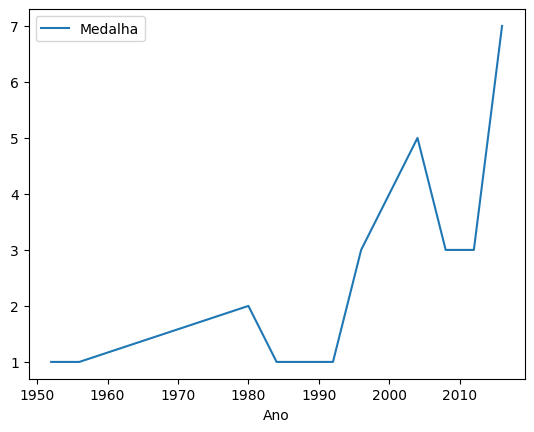

In [39]:
#plotando o grafico
olimPais[(olimPais['Sigla'] == 'BRA') & (olimPais['Medalha'] == 'Gold')].groupby(['Ano'])[['Medalha']].count().plot()